## 最尤推定のPythonプログラム

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

### パラーメータの真値

In [3]:
A = 0.8 
B = -0.3
Sigma = 0.1

### データの生成

In [4]:
def logistic(x):
    epsilon = np.random.normal(0, Sigma, len(x))
    return (1.0/(1+np.exp(- A * x -B)) + epsilon)

x1 = np.sort(np.random.normal(0,1,20))
x2 = np.sort(np.random.normal(0,1,50))
x3 = np.sort(np.random.normal(0,1,100))

y1=logistic(x1)
y2=logistic(x2)
y3=logistic(x3)

data_sets =[{"x":x1, "y":y1}, {"x":x2, "y":y2}, {"x":x3, "y":y3} ]

### データのプロット

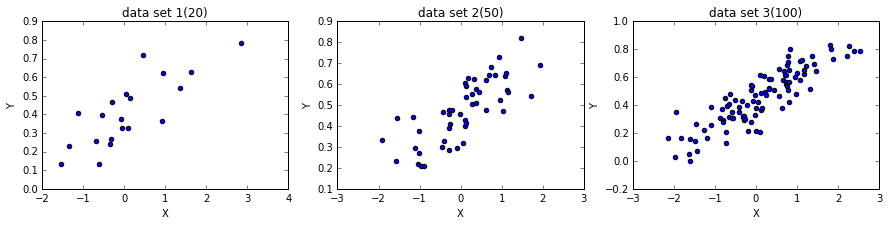

In [6]:
fig1 = plt.figure(figsize=(15,3))

splot1 = fig1.add_subplot(1,3,1)
splot1.scatter(x1, y1)
splot1.title.set_text("data set 1(20)")
splot1.set_xlabel("X")
splot1.set_ylabel("Y")

splot2 = fig1.add_subplot(1,3,2)
splot2.scatter(x2,y2)
splot2.title.set_text("data set 2(50)")
splot２.set_xlabel("X")
splot２.set_ylabel("Y")

splot3 = fig1.add_subplot(1,3,3)
splot3.title.set_text("data set 3(100)")
splot3.scatter(x3,y3)
splot3.set_xlabel("X")
splot3.set_ylabel("Y")
plt.savefig("dateset.pdf")
plt.show()

### 勾配上昇法(Gradient Ascent Method)

In [ ]:
def gd(a, b, xarray, yarray):
    grad = [0.0, 0.0] 

    n = len(xarray)
    for i in range(n):
        x =xarray[i]
        y =yarray[i]
        
        z = -a * x - b
        s = 1.0/(1.0+ np.exp(z))
        eps = y - s
        tmp = eps * s * (1 - s)
        
        grad[0] += (tmp * x)
        grad[1] += (tmp )
        
    return(grad)

In [ ]:
def fisher_info(a, b, sigma, xarray, yarray):
    var = sigma **2
    n = len(xarray)
    g = 1/(sigma * np.sqrt(2*np.pi))
    Info = [0, 0]
    for i in range(n):
        x = xarray[i]
        y = yarray[i]
        
        z = -a * x - b
        S = 1.0/(1.0 + np.exp(z))
        eps = y - S
        tmp = eps * S * (1 - S)
        
        p = g * np.exp(-(eps ** 2)/(2 * var))
        
        d_log_p_a = ((tmp * x / var)**2) * p
        d_log_p_b = ((tmp / var) **2 )* p
      
    Info[0] += d_log_p_a
    Info[1] += d_log_p_b
 
    return(Info)    

### 勾配上昇法の実行

In [ ]:
def run_gd(x, y):
    # 初期値
    a = [0]
    b = [0]

    # 学習率
    eita=0.001
    
    e = 0.0001
    
    for i in range(2000):
        grad = gd(a[-1], b[-1], x, y)
        
        flag = 0
        for g in grad:
            if np.abs(eita*g) < e :
                flag +=1
        if flag >= 2 :
            break   
        a.append(a[i] + eita* grad[0])
        b.append(b[i] + eita * grad[1])

    return a, b

### 勾配上昇法のグラフのプロット

In [ ]:
latex_data=[]
for i, data in enumerate(data_sets):
    start = time.time()
    a1, b1= run_gd (data["x"], data["y"])
#     info = fisher_info(a1[-1], b1[-1], 0.1, data["x"], data["y"])
    elapsed_time = time.time() - start
    
    print("data set %d:\n計算回数:%d\nパラメーター推定値： a=%5lf, b=%5lf, " % ( i +1, len(a1)-1, a1[-1], b1[-1]))
#     print("フィッシャ情報量： I(a)=%f, I(b)=%f"%(info[0], info[1]))
    print("誤差： Err(a)=%f, Err(b)=%f"%(np.abs(A - a1[-1]), np.abs(B - b1[-1])))
    print("経過時間：=%f"%(elapsed_time))
    
    latex_data.append("%d & %d & %d & %f & %5lf & %f & %5lf & %f \\\\"%( i+1, len(data["x"]), len(a1)-1, elapsed_time, a1[-1], np.abs(A - a1[-1]),b1[-1],np.abs(B - b1[-1])))
    
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(len(a1)), np.array(a1), label="a")
    plt.plot(np.arange(len(b1)), np.array(b1), label="b")
#     plt.plot(np.arange(len(sigma1)), np.array(sigma1), label="sigma")
    plt.legend(loc="upper center")
    plt.title("data set %d"%( i+1))
    plt.show() 
for item in latex_data:
    print(item)

### ニュートン・ラフソン法(Newton-Raphson method）

In [ ]:
def newton(a, b, xarray, yarray):
    # var = 0.01
    n = len(xarray)
    
    Hessian = [[0.0 for j in range(2)] for i in range(2)]
    grad = [0.0 for j in range(2)] 
    
    for i in range(n):    
        x =xarray[i]
        y =yarray[i]
        
        z = -a * x - b
        s = 1.0/(1.0+ np.exp(z))
        eps = y - s
        
        phi = y - 2 * s * (y + 1) + 3 * (s ** 2)
        psi = s * (1 - s)
        
        eps_psi = eps * psi
        
        grad[0] += (eps_psi * x)
        grad[1] += (eps_psi )

        phi_psi = phi * psi
        phi_psi_x = phi_psi * x
        
        Hessian[0][0] += (phi_psi_x * x)
        Hessian[0][1] += phi_psi_x
        
        #Hessian[1][0] += phi_psi_x
        Hessian[1][1] += phi_psi
    

    
    Hessian = np.array(Hessian)

    inverseH = np.linalg.inv(Hessian)

    return inverseH.dot(np.array(grad))

### ニュートン法の実行

In [ ]:
def run_newton(xarray, yarray):
    # 初期値＞１にしたら、収束しない
    a = [0]
    b = [0]
 
    variable = np.array([1, 1])
    
    eita = 1
    e = 0.0000001
    
    for i in range(1000):
        flag = 0
        # 準偏差を定数0.1にする
        h_g = newton(a[-1], b[-1], xarray, yarray)
        #print ("h_g", h_g)
        for item in h_g:
            if np.abs(item) < e:
                flag += 1
        if flag >= len(h_g):
            break
        a.append(a[i] - eita * h_g[0])
        b.append(b[i] - eita * h_g[1])
        # s.append(s[i] - eita * h_g[2])

    return a,b

### ニュートン法のグラフのプロット

In [ ]:
latex_data =[]
for i, data in enumerate(data_sets):
    start = time.time()
    
    a4, b4= run_newton(data["x"], data["y"])
#     info = fisher_info(a4[-1], b4[-1], 0.1, data["x"], data["y"])
    elapsed_time = time.time() - start
    
    print("data set %d:\n計算回数:%d\nパラメーター推定値： a=%5lf, b=%5lf, " % ( i +1, len(a4)-1, a4[-1], b4[-1]))
#     print("フィッシャ情報量： I(a)=%f, I(b)=%f"%(info[0], info[1]))
    print("誤差： Err(a)=%f, Err(b)=%f"%(np.abs(A - a4[-1]), np.abs(B - b4[-1])))
    print("経過時間：=%f"%(elapsed_time))
    latex_data.append("%d & %d & %d & %f & %5lf & %f & %5lf & %f \\\\"%( i+1, len(data["x"]), len(a4)-1, elapsed_time, a4[-1], np.abs(A - a4[-1]),b4[-1],np.abs(B - b4[-1])))
    
    plt.plot(np.arange(len(a4)), np.array(a4), label="a")
    plt.plot(np.arange(len(b4)), np.array(b4), label="b")
    # plt.plot(np.arange(len(s4)), np.array(s4))
    plt.legend(loc="center right")
    plt.title("data set %d"%( i+1))
    plt.show()
for item in latex_data:
    print(item)